THis notebook explores the usage of random forest for phishing detection

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn modules
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('dataset/CEAS_08.csv')
df

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


Cleaning Dataset

In [3]:
df = df.dropna()
df = df.reset_index(drop =True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38669 entries, 0 to 38668
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    38669 non-null  object
 1   receiver  38669 non-null  object
 2   date      38669 non-null  object
 3   subject   38669 non-null  object
 4   body      38669 non-null  object
 5   label     38669 non-null  int64 
 6   urls      38669 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB
None


subject based detection

In [4]:
# Use this block to predict phishing subject-based
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['subject'])
y = df['label']

# Split data into training and test sets
X_train_subject, X_test_subject, y_train_subject, y_test_subject = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_subject = RandomForestClassifier(n_estimators=100, random_state=42)
rf_subject.fit(X_train_subject, y_train_subject)

# Predict and evaluate
y_pred_subject = rf_subject.predict(X_test_subject)

print("Accuracy:", accuracy_score(y_test_subject, y_pred_subject))
print(classification_report(y_test_subject, y_pred_subject))


Accuracy: 0.9789242306697699
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3379
           1       0.97      0.99      0.98      4355

    accuracy                           0.98      7734
   macro avg       0.98      0.98      0.98      7734
weighted avg       0.98      0.98      0.98      7734



---Training vs Testing Accuracy---
Training Accuracy: 0.9928
Testing Accuracy:  0.9789

Check for overfitting...


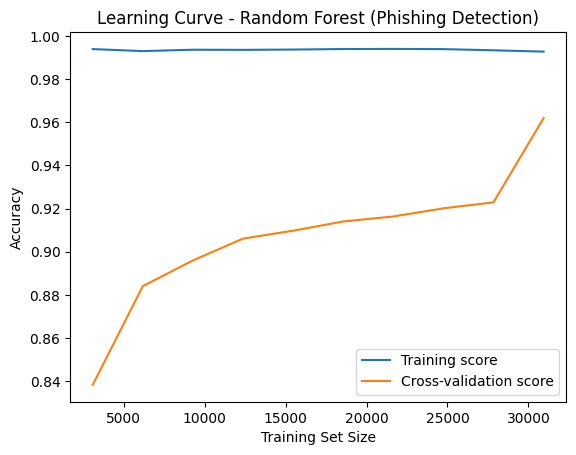

 
---Cross Validation---
Cross validation scores: [0.94414275 0.97375226 0.97465736 0.9680631  0.94917884]
Mean CV accuracy: 0.9619588616199616


In [5]:
print("---Training vs Testing Accuracy---")
train_pred = rf_subject.predict(X_train_subject)
test_pred = rf_subject.predict(X_test_subject)

train_acc = accuracy_score(y_train_subject, train_pred)
test_acc = accuracy_score(y_test_subject, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

print("\nCheck for overfitting...")
train_sizes, train_scores, test_scores = learning_curve(
    rf_subject, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - Random Forest (Phishing Detection)')
plt.show()
print(" ")
print("---Cross Validation---")
cv_scores = cross_val_score(rf_subject, X, y, cv=5, scoring='accuracy')
print("Cross validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

body based detection

In [6]:
# Use this block to predict using body based
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['body'])
y = df['label']

# Split data into training and test sets
X_train_body, X_test_body, y_train_body, y_test_body = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_body = RandomForestClassifier(n_estimators=100, random_state=42)
rf_body.fit(X_train_body, y_train_body)

# Predict and evaluate
y_pred_body = rf_body.predict(X_test_body)

print("Accuracy:", accuracy_score(y_test_body, y_pred_body))
print(classification_report(y_test_body, y_pred_body))

Accuracy: 0.9917248513059219
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3379
           1       0.99      0.99      0.99      4355

    accuracy                           0.99      7734
   macro avg       0.99      0.99      0.99      7734
weighted avg       0.99      0.99      0.99      7734



---Training vs Testing Accuracy---
Training Accuracy: 0.9999
Testing Accuracy:  0.9917

Check for overfitting...


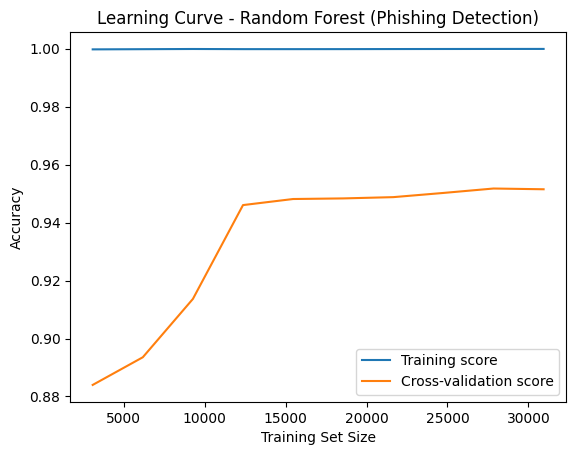

 
---Cross Validation---
Cross validation scores: [0.98965606 0.99069046 0.99133695 0.98176881 0.80382775]
Mean CV accuracy: 0.9514560079583966


In [7]:
print("---Training vs Testing Accuracy---")
train_pred = rf_body.predict(X_train_body)
test_pred = rf_body.predict(X_test_body)

train_acc = accuracy_score(y_train_body, train_pred)
test_acc = accuracy_score(y_test_body, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

print("\nCheck for overfitting...")
train_sizes, train_scores, test_scores = learning_curve(
    rf_body, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - Random Forest (Phishing Detection)')
plt.show()
print(" ")
print("---Cross Validation---")
cv_scores = cross_val_score(rf_body, X, y, cv=5, scoring='accuracy')
print("Cross validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

sender based

In [8]:
# Use this to predict using sender (maybe reciver also)
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['sender'])
y = df['label']

# Split data into training and test sets
X_train_sender, X_test_sender, y_train_sender, y_test_sender = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_sender = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sender.fit(X_train_sender, y_train_sender)

# Predict and evaluate
y_pred_sender = rf_sender.predict(X_test_sender)

print("Accuracy:", accuracy_score(y_test_sender, y_pred_sender))
print(classification_report(y_test_sender, y_pred_sender))

Accuracy: 0.9515128006206361
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3379
           1       0.94      0.98      0.96      4355

    accuracy                           0.95      7734
   macro avg       0.95      0.95      0.95      7734
weighted avg       0.95      0.95      0.95      7734



Training vs Testing Accuracy
Training Accuracy: 0.9709
Testing Accuracy:  0.9515

Check for overfitting...


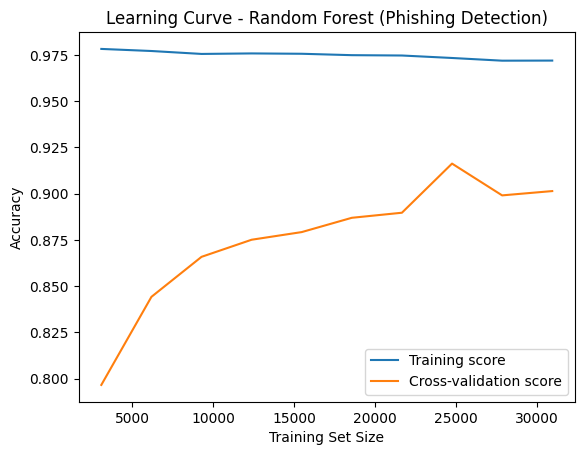

 
---Cross Validation---
Cross validation scores: [0.9349625  0.9352211  0.94142746 0.92901474 0.7611535 ]
Mean CV accuracy: 0.9003558612231186


In [9]:
print("Training vs Testing Accuracy")
train_pred = rf_sender.predict(X_train_sender)
test_pred = rf_sender.predict(X_test_sender)

train_acc = accuracy_score(y_train_sender, train_pred)
test_acc = accuracy_score(y_test_sender, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

print("\nCheck for overfitting...")
train_sizes, train_scores, test_scores = learning_curve(
    rf_sender, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - Random Forest (Phishing Detection)')
plt.show()
print(" ")
print("---Cross Validation---")
cv_scores = cross_val_score(rf_sender, X, y, cv=5, scoring='accuracy')
print("Cross validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

body, sender, subject based detection

In [10]:
# Use this to take into context subject, body and sender 
df['combined_text'] = (
    df['subject'].fillna('') + ' ' +
    df['body'].fillna('') + ' ' +
    df['sender'].fillna('')
)
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['combined_text'])
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_all = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,            
    min_samples_split=5,   
    min_samples_leaf=3,      
    max_features='sqrt',     
    bootstrap=True,         
    random_state=42,
    n_jobs=-1
)
rf_all.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_all.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9604344453064391
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3379
           1       0.94      1.00      0.97      4355

    accuracy                           0.96      7734
   macro avg       0.97      0.96      0.96      7734
weighted avg       0.96      0.96      0.96      7734



---Training vs Testing Accuracy---
Training Accuracy: 0.9599
Testing Accuracy:  0.9604
 

Check for overfitting...


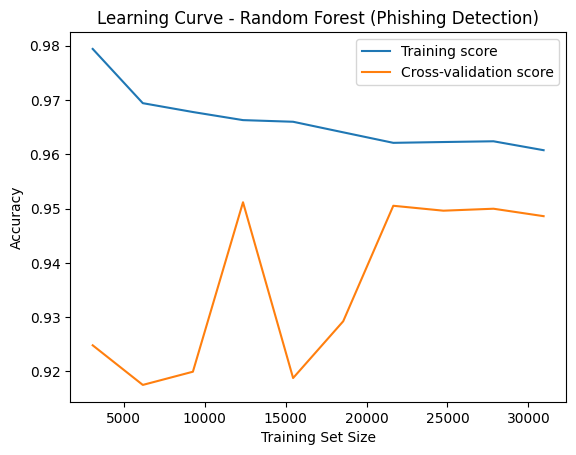

 
---Cross Validation---
Cross validation scores: [0.95720197 0.96457202 0.96030515 0.95681407 0.90404759]
Mean CV accuracy: 0.9485881574240563


In [11]:
print("---Training vs Testing Accuracy---")
train_pred = rf_all.predict(X_train)
test_pred = rf_all.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(" ")
print("\nCheck for overfitting...")
train_sizes, train_scores, test_scores = learning_curve(
    rf_all, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - Random Forest (Phishing Detection)')
plt.show()
print(" ")
print("---Cross Validation---")
cv_scores = cross_val_score(rf_all, X, y, cv=5, scoring='accuracy')
print("Cross validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

use fuzzy rules to take into context the individual models for subject body and sender and combine them into one fuzzy logic based model to predict phishing emails

In [12]:
import skfuzzy.control as ctrl
import skfuzzy as fuzz

In [14]:
body_prob = rf_body.predict_proba(X_test_body)[:, 1]
subject_prob = rf_subject.predict_proba(X_test_subject)[:, 1]
sender_prob = rf_sender.predict_proba(X_test_sender)[:, 1]


subject_score = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'subject_score')
body_score = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'body_score')
sender_score = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'sender_score')

phishing = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'phishing')
for var in [subject_score, body_score, sender_score]:
    var['low'] = fuzz.trimf(var.universe, [0, 0, 0.4])
    var['medium'] = fuzz.trimf(var.universe, [0.3, 0.5, 0.7])
    var['high'] = fuzz.trimf(var.universe, [0.6, 1, 1])

phishing['no'] = fuzz.trimf(phishing.universe, [0, 0, 0.5])
phishing['yes'] = fuzz.trimf(phishing.universe, [0.5, 1, 1])

In [ ]:
# Define fuzzy logic rules
rule1 = ctrl.Rule(subject_score['high'] | body_score['high'], phishing['yes'])
rule2 = ctrl.Rule(sender_score['high'] & (subject_score['medium'] | body_score['medium']), phishing['yes'])
rule3 = ctrl.Rule(subject_score['low'] & body_score['low'] & sender_score['low'], phishing['no'])

# Build fuzzy control system with defined rules
phishing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
phishing_detector = ctrl.ControlSystemSimulation(phishing_ctrl)

final_scores = []

for i in range(len(y_test)):
    # Create a new simulation for each sample
    phishing_detector = ctrl.ControlSystemSimulation(phishing_ctrl)

    # Pass the model probabilities as fuzzy inputs
    phishing_detector.input['subject_score'] = subject_prob[i]
    phishing_detector.input['body_score'] = body_prob[i]
    phishing_detector.input['sender_score'] = sender_prob[i]

    phishing_detector.compute()

    # Safely handle missing outputs
    score = phishing_detector.output.get('phishing', 0.0)
    final_scores.append(score)

# Convert to binary predictions
final_pred = (np.array(final_scores) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, final_pred))
print(classification_report(y_test, final_pred))

Accuracy: 0.9811223170416343
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3379
           1       0.97      1.00      0.98      4355

    accuracy                           0.98      7734
   macro avg       0.98      0.98      0.98      7734
weighted avg       0.98      0.98      0.98      7734

